## <span style="color:blue">Code groups</span>


### <span style="color:#008891">Lists of items grouped by use and/or industry for analysis </span>

The code groups are from MSFD Masterlist and includes codes added to identify items in Swiss freshwater systems. For the complete list visit [mcc.jrc.ec.europa.eu › documents](https://mcc.jrc.ec.europa.eu/documents/201702074014.pdf) Annex 8.1 - Master List of Categories of Litter Items.  
[https://www.hammerdirt.ch/ ](https://www.hammerdirt.ch/) Documents: Additional Codes for Swiss Waterways

__What this does:__ This note book creates codes gouped by industry or use. The grouping is not finite and individual codes maybe added or removed. The grouping is derived from field observations and to answer fundemental questions:

1. what is the item

2. how is the item used

3. where did the item come from

__When to use it:__ Whenever you want to analyze a series of coded items they maybe useful to indicate variations based on:

1. population densities

2. infrastructure densities

3. waterway concentrations

4. seasonality

5. regional differences

6. previous and/or other current data



#### Tasks:


questions or comments: shannon@hammerdirt.ch

In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


# home brew utitilties
import utilities.utility_functions as ut

# documenting
from IPython.display import Markdown as md

def make_table_grids(anax):
    anax.grid(False)
    anax.spines["top"].set_visible(False)
    anax.spines["right"].set_visible(False)
    anax.spines["bottom"].set_visible(False)
    anax.spines["left"].set_visible(False)
    return(anax)
def table_fonts(a_table, size=12):
    a_table.auto_set_font_size(False)
    a_table.set_fontsize(size)
    
# method to save
files_generated=[]
def add_output(a_name, a_tag, atype="table", fignum=0, a_list=files_generated):
    tableonefile = F"{project_directory}/{a_name}"
    files_generated.append({'tag':a_tag, 'number':fignum, 'file':tableonefile,'type':atype})
    plt.savefig(tableonefile, dpi=300)


    
# table kwargs
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
title_k = {'loc':'left', 'pad':12, 'linespacing':1.5, 'fontsize':12}
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

table_num = 1

In [2]:
# the local file structure. The resources are located in the corresponding directory.
# the purpose and date should be included in the filename when saving results to output
survey_data, location_data, code_defs, stat_ent, geo_data, output = ut.make_local_paths()

In [3]:
# probably want to keep these... the works already done
# aggregated survey data
dfAgg = pd.read_csv(F"{survey_data}/results_with_zeroes_aggregated_parent.csv")
dfAgg['date'] = pd.to_datetime(dfAgg['date'])

# non aggregated survey data
dfSurveys = pd.read_csv(F"{survey_data}/results_with_zeroes.csv")
dfSurveys['date'] = pd.to_datetime(dfSurveys['date'])

# beach data
dfBeaches = pd.read_csv(F"{location_data}/beaches_pop_bfs.csv")

# code definitions
dfCodes = pd.read_csv(F"{code_defs}/mlw_codes.csv")

In [4]:
project_directory = ut.make_project_folder(output, 'code_groups')

### <span style="color:#008891">Micro codes</span>

Micro codes are all micro plastics and foams from Annex 8.1 - Master List of Categories of Litter Items G103-G123. Not all codes have been identified in our data. 

In [5]:
grouped = []
groups = {}

In [6]:
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]
ut.push_this_to_json(filename=F"{project_directory}/codeListMicros.json", data=codesmicro)
grouped = grouped + codesmicro
groups.update({x:'micro' for x in codesmicro})

putting: output/code_groups/codeListMicros.json


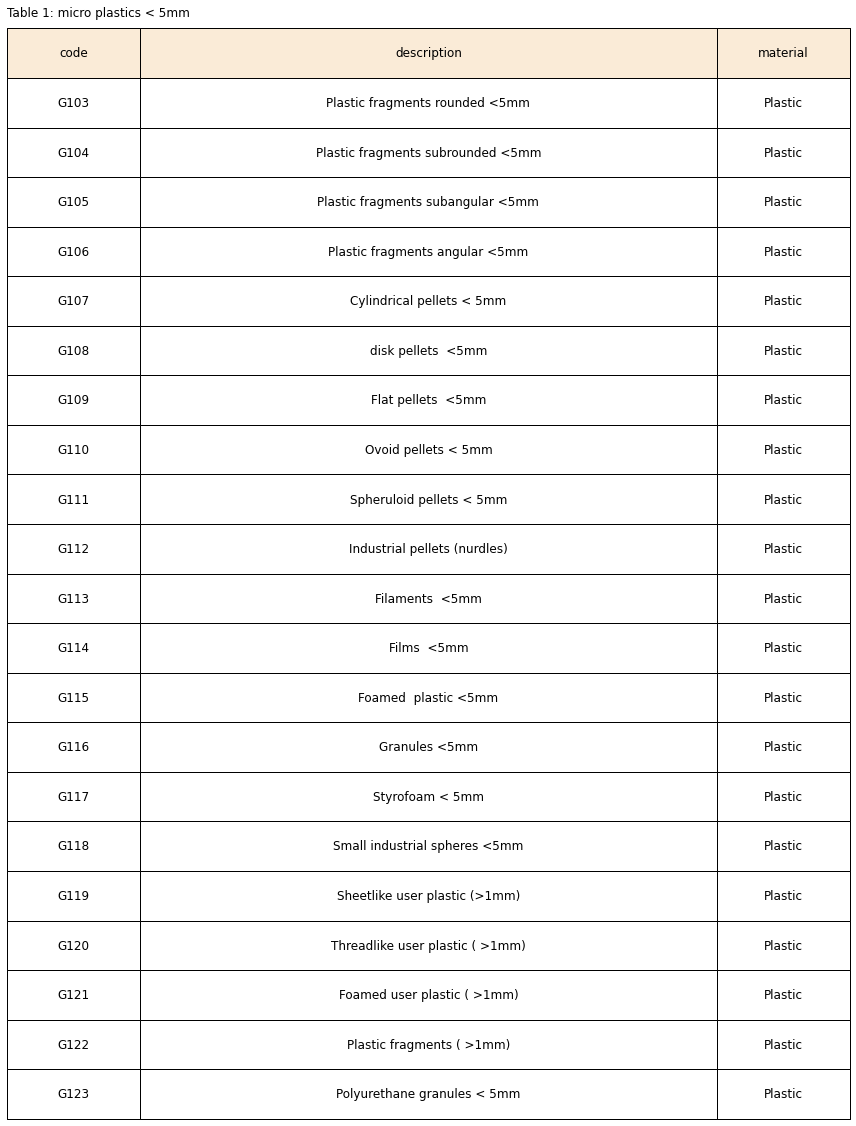

In [7]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(codesmicro)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: micro plastics < 5mm", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Micro codes are all micro plastics and foams"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Agriculture</span>

The agriculture codes are primarily codes that have been added over the course of this project and have been identified in our data.


In [8]:
ag=['G36',    
'G936',
'G937',
'G943']
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/ag.json", data=ag)
grouped = grouped + ag
# groups.append({"ag":ag})
groups.update({x:"ag" for x in ag})

putting: output/code_groups/ag.json


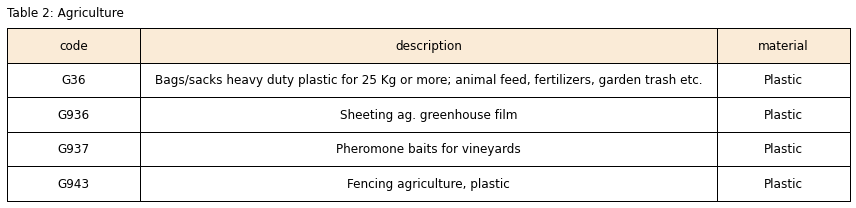

In [9]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(ag)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Agriculture", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to agricultural industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Construction codes</span>

This list includes items from the Marine Litter Watch Master list and additional codes created for this project.
The following items in the construction code list have not been identified in our data as of 31.01.2021: 
'G69', 'G72', 'G169', 'G189'


In [10]:

construction=['G9',
              'G17',
              'G22',
              'G66',
              'G68',
              'G69',
              'G72',
              'G74',
              'G81',
              'G82',
              'G83',
              'G87',
              'G89',
              'G93',
              'G160',
              'G162',
              'G169',
              'G174',
              'G186',
              'G188',
              'G189',
              'G190',
              'G194',
              'G908',
              'G921',
              'G931']
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/construction.json", data=construction)
grouped = grouped + construction
groups.update({x:"cons" for x in construction})

putting: output/code_groups/construction.json


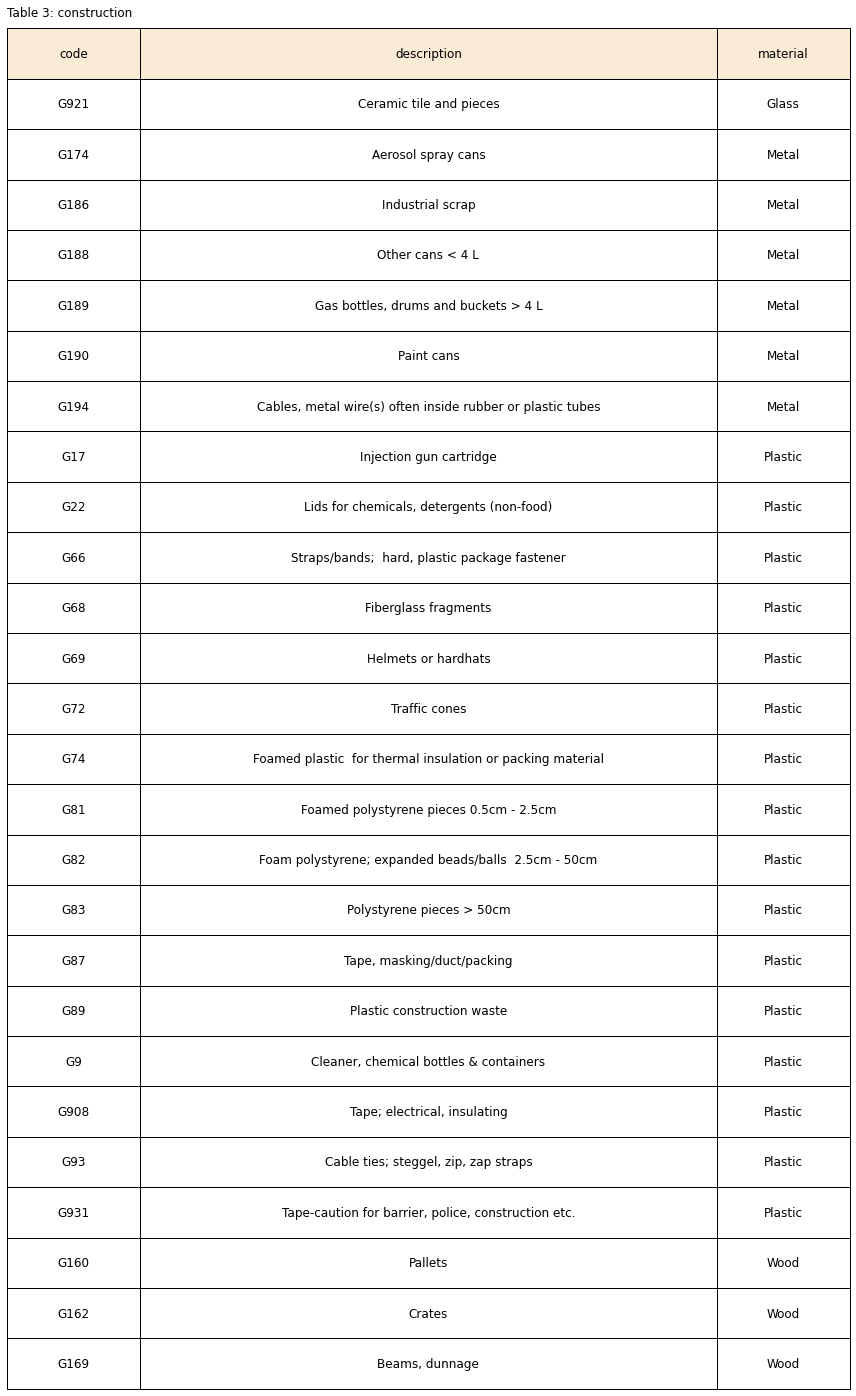

In [11]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(construction)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: construction", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to construction industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Wastewater treatment codes</span>

describe wastewater treatment codes

In [12]:

wastewater = [
    'G91',
    'G95',
    'G96',
    'G98',
    'G97',
    'G100',
    'G133',
    'G144'
]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/wastewater.json", data=wastewater)
grouped = grouped + wastewater

groups.update({x:'waste_water' for x in wastewater})

putting: output/code_groups/wastewater.json


In [13]:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

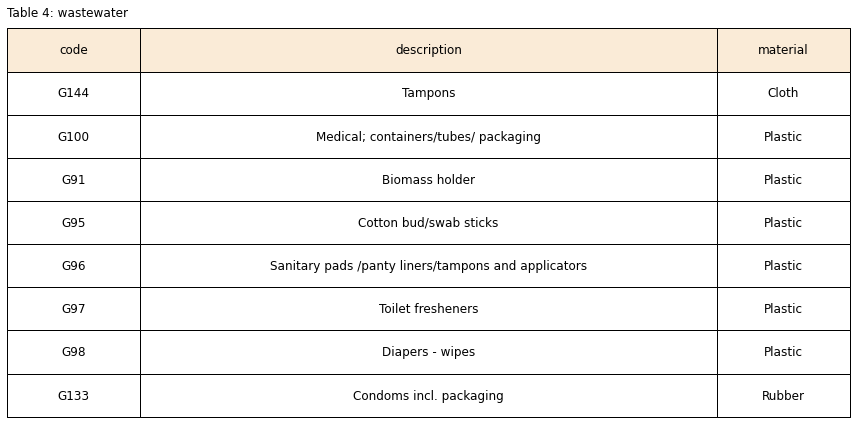

In [14]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: wastewater", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to wastewater treatment"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Recreation codes</span>

Recreation codes includes fishing, hunting, boating and beach related items excluding food, drink and tobacco items from Annex 8.1 - Master List of Categories of Litter Items and additional codes that have been found in Swiss waterways. Not all codes have been identified in our data. Example G163 Crab/lobster pots

In [15]:
recreation = [
    'G32',
    'G42',
    'G43',
    'G44',
    'G45',
    'G46',
    'G47',
    'G48',
    'G49',
    'G50',
    'G49',
    'G51',
    'G52',
    'G53',
    'G54',
    'G53',
    'G63',
    'G70',
    'G73',
    'G86',
    'G92',
    'G94',
    'G206',
    'G207',
    'G132',
    'G142',
    'G143',
    'G155',
    'G163',
    'G164',
    'G167',
    'G182',
    'G183',
    'G184',
    'G125',
    'G126',
    'G11',
    'G29',
    'G213',
    'G904'
  ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/recreation.json", data=recreation)
grouped = grouped + recreation
# groups.append({"recre":recreation})
groups.update({x:'recre' for x in recreation})


putting: output/code_groups/recreation.json


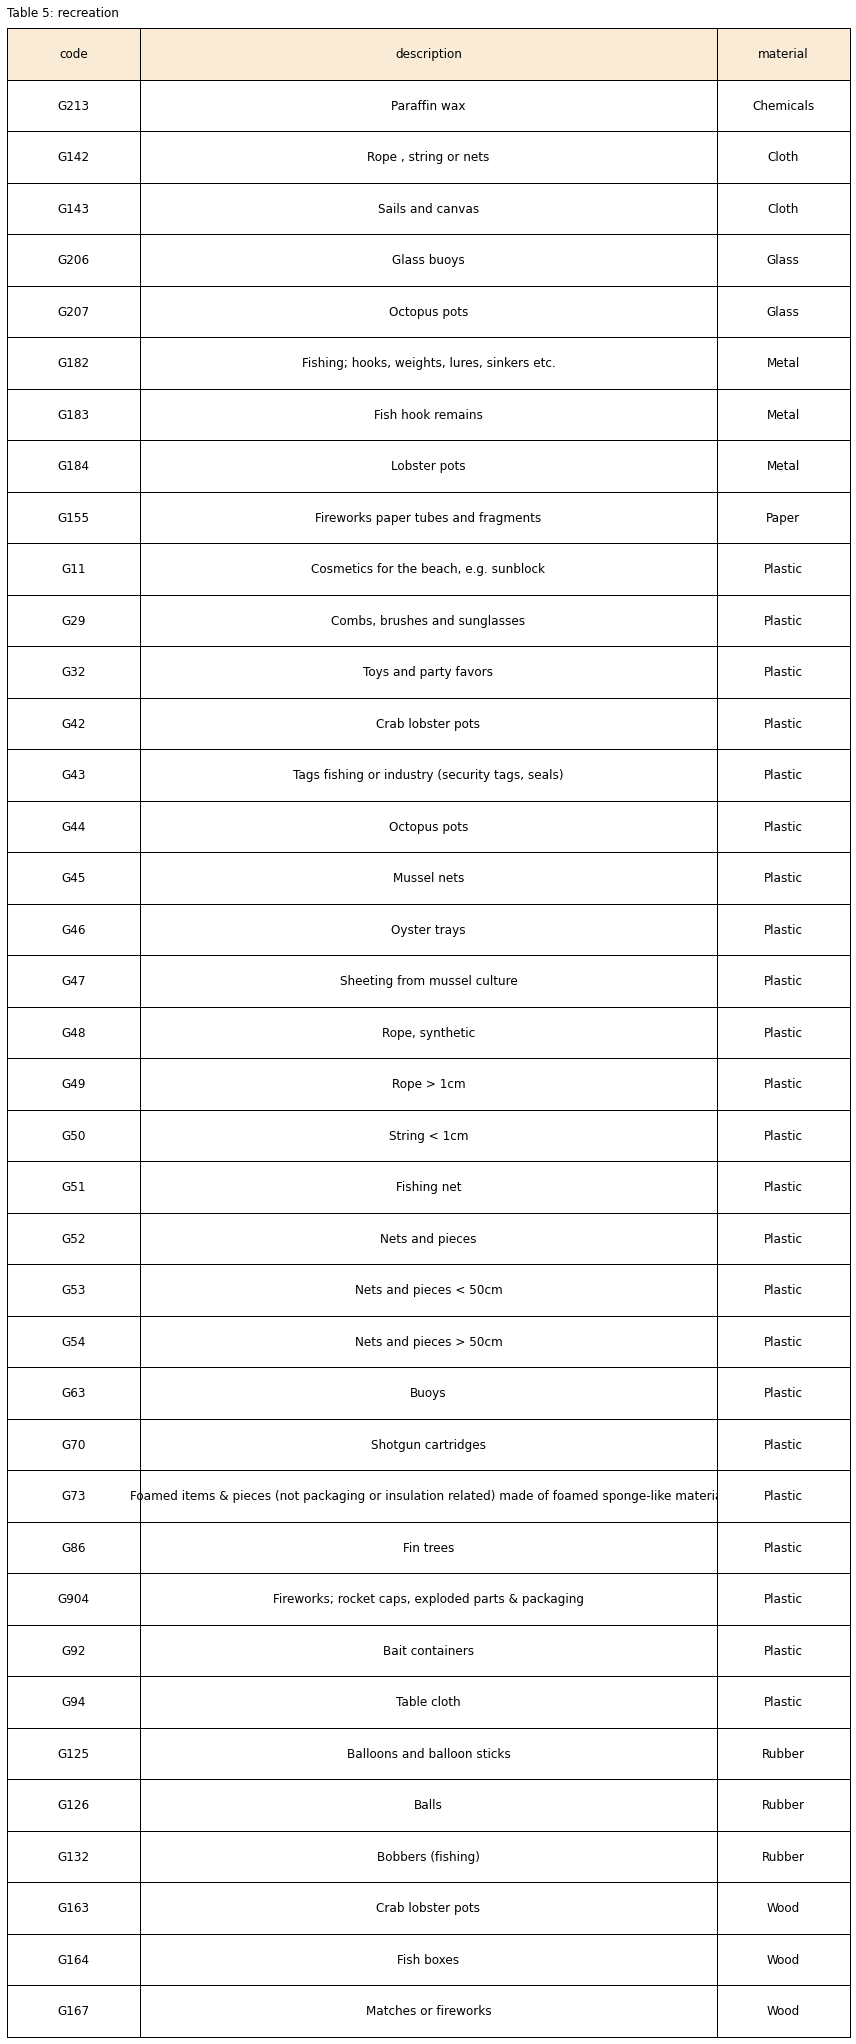

In [16]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(recreation)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: recreation", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Fishing, hunting, boating and beach related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Food and drink codes</span>

Food and drink codes includes consumable items related to picknicking from Annex 8.1 - Master List of Categories of Litter Items. 

In [17]:
foodstuff = [
    'G1',
    'G8',
    'G7',
    'G10',
    'G21',
    'G24',
    'G30',
    'G175',
    'G176',
    'G177',
    'G178',
    'G179',
    'G181',
    'G200',
    'G150',
    'G153',
    'G159',
    'G165',
    'G31',
    'G33',
    'G34',
    'G35'
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/foodstuff.json", data=foodstuff)
grouped = grouped + foodstuff
# groups.append({"food":foodstuff})
groups.update({x:"food" for x in foodstuff})

putting: output/code_groups/foodstuff.json


In [ ]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(foodstuff)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Food and Drink", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Food and drink related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Construction, agriculture and transportation codes</span>

Construction, agriculture and transportation related items from Annex 8.1 - Master List of Categories of Litter Items and additional codes that have been found in Swiss waterways.

In [ ]:
cat = [
    "G13",
    "G14",
    "G15",
    "G16", 
    "G18", 
    "G38", 
    "G41",
    "G67",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G187",
    "G191",
    "G192",
    "G204",
    "G919", 
    "G934"
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/cat.json", data=cat)
grouped = grouped + cat
# groups.append({"cat":cat})
groups.update({x:"cat" for x in cat})

In [ ]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(cat)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Construction, agriculture and transportation", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Construction, agriculture and transportation related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Tobacco codes</span>

Tobacco related items from Annex 8.1 - Master List of Categories of Litter Items.

In [ ]:
tobac = [
    'G25',
    'G26',
    'G27',
    'G152',
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/tobac.json", data=tobac)
grouped = grouped + tobac

groups.update({x:"tobaco" for x in tobac})

In [ ]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(tobac)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Tobacco", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Tobacco related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

In [ ]:
### <span style="color:#008891">Recreation codes</span>
print("\ncodes grouped:\n")
print(grouped)
print("\ncodes not grouped:\n")
print(dfCodes[~dfCodes.code.isin(grouped)].code.values)
print("\ncodes not grouped abrev list:\n")

In [ ]:
ng=dfCodes[~dfCodes.code.isin(grouped)]

figname = F"workinglist.csv"
filename=F"{output}/code_groups/{figname}"
ng.to_csv(filename, index=None) 

### <span style="color:blue">Codes no id</span>

In [ ]:

hmm = dfSurveys.copy()
hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

found = hmm.code.unique()

ahh=[code for code in dfCodes.code if code not in found]


# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/codeNotfound.json", data=ahh)

# construction codes that have not been identified
[code for code in construction if code in ahh]

In [ ]:
dfCodes['source_two'] = 'unk'

def assgin_a_group(x,groups):
    try:
        send = groups[x]
    except:
        send = 'unk'
    return send
    
    
for group in groups:
    dfCodes['source_two'] = dfCodes.code.map(lambda x: assgin_a_group(x,groups))
dfCodes.groupby('source_two').code.count()

#### Hopefully that just worked for you

if not contact shannon@hammerdirt.ch

In [ ]:
dfCodes[dfCodes.source_two == 'cons']
figname = F"codes_with_groups.csv"
filename=F"{output}/code_groups/{figname}"
dfCodes.to_csv(filename, index=None) 